In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


nltk.download('stopwords')
nltk.download('wordnet')


sns.set(style='whitegrid')

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Train.csv')
test  =pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Test (2).csv')

In [ ]:
print("Training Dataset:")
print(train.head())
print("\nTest Dataset:")
print(test.head())

Training Dataset:
   Id                                               Body Sentiment Type
0   1  rule 2 no metes about polarizing political top...        neutral
1   2                                                NaN        neutral
2   3  no politics danger now i can make a propaganda...       negative
3   4                       i am the senate gets stabbed        neutral
4   5                                  is this a suicide        neutral

Test Dataset:
   Id                                               Body
0   1  rule 2 no metes about polarizing political top...
1   2                                                NaN
2   3  no politics danger now i can make a propaganda...
3   4                       i am the senate gets stabbed
4   5                                  is this a suicide


In [ ]:
train.isnull().sum()

,0
Id,0
Body,228
Sentiment Type,0


In [ ]:
train['Sentiment Type'].value_counts()

,count
Sentiment Type,
neutral,1010
positive,632
negative,358


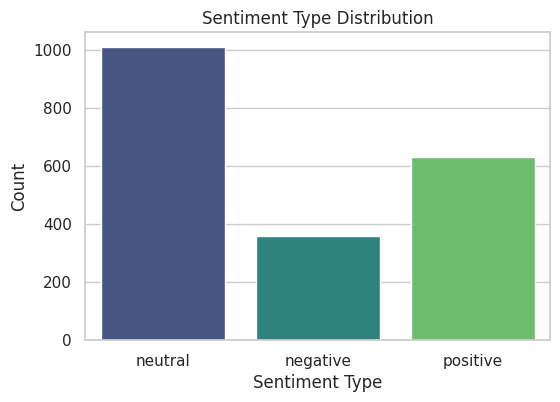

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=train, x='Sentiment Type', palette='viridis')
plt.title('Sentiment Type Distribution')
plt.xlabel('Sentiment Type')
plt.ylabel('Count')
plt.show()

In [ ]:
train= train.dropna()
test=test.dropna()
train=train.dropna(subset=['Body'])
test=test.dropna(subset=['Body'])

In [ ]:

import nltk
nltk.data.path.append('/usr/share/nltk_data')
nltk.download('wordnet', download_dir='/usr/share/nltk_data')


from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r'<[^>]*>', '', text)
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])
    else:
        text = ''
    return text


train['Body'] = train['Body'].apply(clean_text)
test['Body'] =test['Body'].apply(clean_text)


print("\nCleaned Text in Training Data:")
print(train['Body'].head())



[nltk_data] Downloading package wordnet to /usr/share/nltk_data...



Cleaned Text in Training Data:
0    rule mete polarizing political topic vulnerabl...
2    politics danger make propaganda meme telling p...
3                                   senate get stabbed
4                                              suicide
5                                              removed
Name: Body, dtype: object


In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_train_tfidf = tfidf_vectorizer.fit_transform(train['Body'])
X_test_tfidf = tfidf_vectorizer.transform(test['Body'])


print("\nTF-IDF feature matrix shape for training data:", X_train_tfidf.shape)
print("TF-IDF feature matrix shape for test data:", X_test_tfidf.shape)


TF-IDF feature matrix shape for training data: (1772, 5000)
TF-IDF feature matrix shape for test data: (1772, 5000)


In [ ]:

y_train = train['Sentiment Type']


model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_tfidf, y_train)


y_train_pred = model.predict(X_train_tfidf)

In [ ]:

print("\nTraining Accuracy:", accuracy_score(y_train, y_train_pred))
print("\nClassification Report on Training Data:")
print(classification_report(y_train, y_train_pred))


Training Accuracy: 0.9153498871331829

Classification Report on Training Data:
              precision    recall  f1-score   support

    negative       0.99      0.69      0.81       358
     neutral       0.87      0.99      0.93       782
    positive       0.95      0.95      0.95       632

    accuracy                           0.92      1772
   macro avg       0.94      0.88      0.90      1772
weighted avg       0.92      0.92      0.91      1772



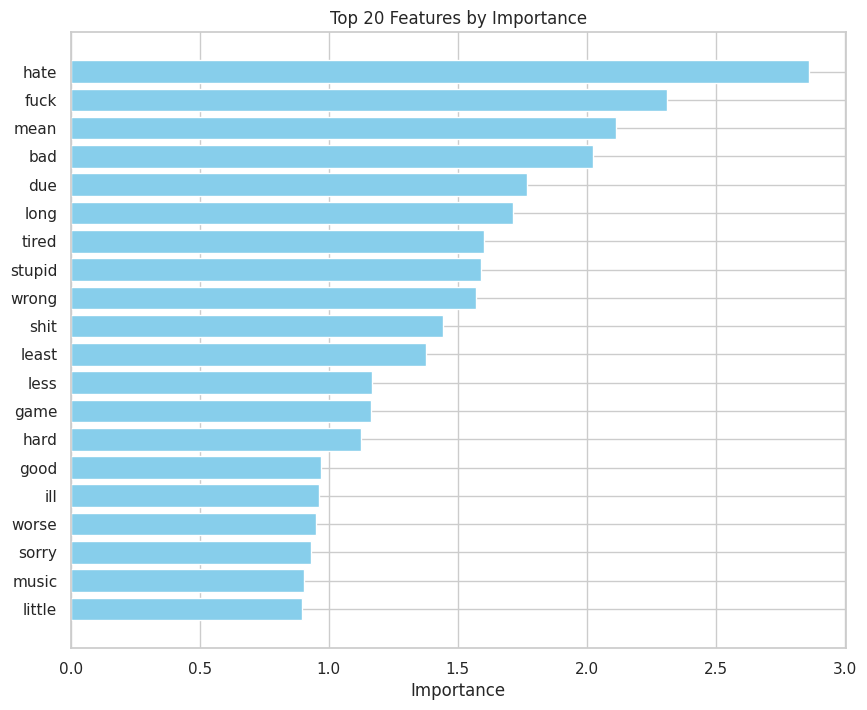

In [ ]:

feature_names = tfidf_vectorizer.get_feature_names_out()
coefficients = model.coef_[0]


feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': np.abs(coefficients)
})

feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
top_features = feature_importance.head(20)
plt.figure(figsize=(10, 8))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Top 20 Features by Importance')
plt.gca().invert_yaxis()
plt.show()


In [ ]:
y_test_pred = model.predict(X_test_tfidf)


test_results = test.copy()
test_results['Sentiment Type'] = y_test_pred
test_results[['Id', 'Body', 'Sentiment Type']].to_csv('test_predictions.csv', index=False)

In [ ]:
import joblib
joblib.dump(model, 'sentiment_model.pkl')
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

In [ ]:
import pickle
filename = 'diabetes_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
loaded_model = pickle.load(open('diabetes_model.sav', 'rb'))

In [ ]:

# Load the model and vectorizer
loaded_model = joblib.load("sentiment_model.pkl")
vectorizer = joblib.load("tfidf_vectorizer.pkl")

# Example input data
input_data = "the ironic part is when his successor tucked them even harder than uncle julius"

# Preprocess the input data
processed_input = clean_text(input_data)

# Transform input using the vectorizer
input_vectorized = vectorizer.transform([processed_input])

# Predict sentiment
prediction = loaded_model.predict(input_vectorized)

print(f"Prediction: {prediction[0]}")


Prediction: positive
